# 6. 일반선형모델
<br/>
<br/>

<hr/>
<br/>


## 6.1 여러가지 확률 분포
#### 이항 분포 , 푸아송 분포 등 확률분포에 대해 알아보자!
<br/>

<strong>이항확률변수란?</strong>
- 2개의 값만 가지는 확률 변수. ex) 있다 없다, 0 1, 앞 뒤


<strong> 베르누이 시행</strong>
- 2 종류의 결과 중 하나만 발생시키는 시행. ex) 동전 던지기!

<strong> 성공확률 </strong>
- 2 종류의 결과 중 어느 한쪽의 결과를 얻을 확률. ex) 동전 던졌을 때 앞이 나올 확률

<strong> 베르누이 분포 </strong>
- 베르누이 시행이 일어날 때 이항확률변수가 따르는 확률분포. 
- ex) 동전을 한번 던져서 앞이 나올지 뒤가 나올지 확률.

<br/>

<div align="center">
p(X=1) = p  <br/>
p(X=0) = 1 - p <br/>
x는 이항확률변수, p 는 성공확률 (x=1 이 나올 경우)
</div>

<br/>

### 그렇다면 이항분포는 무엇일까?
> 성공확률이 p 면서 N 회의 독립 베르누이 시행 (동전던지기!) 을 했을 때 성공한 횟수 m 이 따르는 이산형 확률 분포.<br/>
 m의 기댓값은 Np , 분산은 Np(1-p) 로 계산 (N 은 시행횟수, p 는 성공확률)
 
#### 이항분포의 확률질량 함수
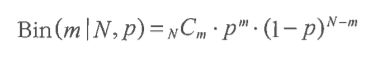

Ex) 동전을 6번 던져서 3번만 앞면이 나올 경우?

$\frac{6!}{3!(6-3)!}$ $p^3$$(1-p)^3$

## 이항분포 실습

In [4]:
## 분석 준비 ##

# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp #과학기술계산을 위한 라이브러리
from scipy import stats #이항분포에 관한 계산을 제공

#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

#표시 자릿수 지정
%precision 3

#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

1. 앞이 나올 확률이 1/2 인 동전을 2 번 던져서 , 2번 중 1번이 앞면일 확률은? (확률질량함수 계산)

In [5]:
# pmf : Probability Mass Function
# k : 성공횟수, n : 시행횟수, p: 성공확률 

sp.stats.binom.pmf(k=1,n=2,p=0.5)

0.5

2. 앞이 나올 확률이 20% 인 동전을 10 번 던졌을 때 앞이 나온 수를 세는 시행을 5번 반복하기

In [8]:
# 난수생성: sp.stats.binom.rvs

np.random.seed(32) #seed가 바뀌면 경우가 다르게 나온다!
sp.stats.binom.rvs(n=10,p=0.2,size=5)

array([3, 1, 2, 4, 3])

3. 난수의 히스토그램과 이항분포의 확률질량 함수에서 계산된 확률을 겹쳐서 그래프로 그려보기.

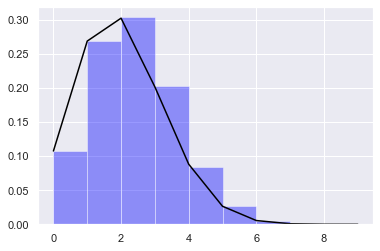

In [10]:
#N=10, p=0.2인 이항 분포
binomial=sp.stats.binom(n=10,p=0.2)

#난수
np.random.seed(1)
rvs_binomial=binomial.rvs(size=10000)

#확률밀도함수
m=np.arange(0,10,1) #0~9개 나올 각 확률
pmf_binomial=binomial.pmf(k=m)


#난수의 히스토그램과 확률질량함수를 겹쳐서 그리기

#난수
sns.distplot(rvs_binomial,bins=m,kde=False,
            norm_hist=True, color="blue")

#확률밀도
plt.plot(m,pmf_binomial,color="black")

히스토그램? 수치형 데이터 분포를 표현해주는 그래프. bins는 x축. 막대갯수

<hr/>

## 푸아송 분포

- <strong>푸아송 분포</strong>란 1개 또는 2개, 1회 또는 2회 등의 <strong>카운트데이터</strong>가 따르는 이산형 확률분포 (?) 
- 단위 시간 or 단위 공간에서 어떤 사건이 발생하는 횟수를 나타내는 확률분포!
- ex) 낚시대를 바꾸면 잡아 올리는 물고기 수가 달라지는지, 날씨에 따라 상품의 판매 개수가 얼마나 달라지는지 등...

### 푸아송 분포의 확률질량함수
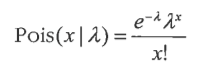
<p> $x$ : 이산형 확률변수(카운트데이터) <br/>
$\lambda$ : 푸아송 분포의 강도 (일이 일어날 횟수에 대한 기댓값)	</p>
<p style="color:red">특정 시간 안에 어떤 사건이 일어날 횟수에 대한 기댓값을 $\lambda$ 라고 했을 때 그 사건이 $x$회 일어날 확률 <p>

### 이항분포와 푸아송 분포의 관계?
*푸아송 분포는 성공확률이 한없이 0 에 가깝지만 시행횟수가 무한히 많은 이항분포*

<hr/>

## 푸아송 분포 실습
푸아송 분포의 확률질량함수는 sp.stats.possion.pmf를 이용!

In [11]:
# 강도가 5인 푸아송 분포에서 어떤 값 2를 얻을 확률 
# 평균값(기댓값)이 5 일 때 2라는 값을 얻을 확률!

sp.stats.poisson.pmf(k=2,mu=5)

0.08422433748856832

In [13]:
#강도가 2인 푸아송 분포를 따르는 난수.
np.random.seed(10)
sp.stats.poisson.rvs(mu=2,size=7)

array([1, 3, 2, 0, 2, 4, 3])

#### 푸아송 분포에서 난수의 히스토그램과 확률질량함수 비교

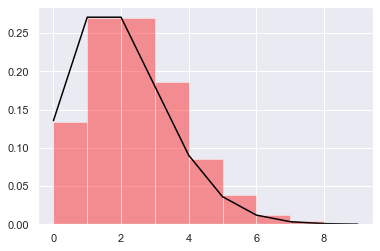

In [14]:
# 강도가 2인 푸아송 분포
poisson=sp.stats.poisson(mu=2)

#난수
np.random.seed(32)
rvs_poisson=poisson.rvs(size=10000)

m=np.arange(0,10,1) #0~9개 나올 각 확률

#확률질량함수
pmf_poisson=poisson.pmf(k=m)

#난수의 히스토그램과 확률질량함수를 겹쳐서 그리기
sns.distplot(rvs_poisson, bins=m, kde=False,
            norm_hist=True, color='red')

plt.plot(m,pmf_poisson,color="black")

#### 푸아송 분포와 이항분포의 관계 확인.
시행횟수를 매우 크게, 성공확률을 0에 매우 근접하고 이항분포의 확률질량 함수와 강도가 2인 푸아송 분포의 확률 질량함수 비교 ( 단, $Np=\lambda$)

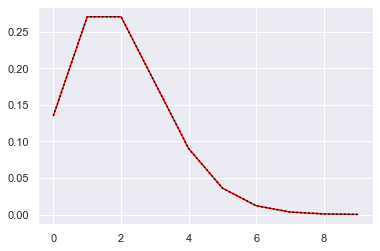

In [15]:
#N이  크고 p 가 작은 이항분포
N=100000000
p=0.00000002
binomial_2=sp.stats.binom(n=N,p=p)

#확률질량함수
m=np.arange(0,10,1)
pmf_binomial_2=binomial_2.pmf(k=m)

#확률질량의 그래프
plt.plot(m,pmf_poisson,color='red') #강도 2의 푸아송 분포
plt.plot(m,pmf_binomial_2,color="black",linestyle='dotted')

 확률분포는 이 외에도 음이항분포, 감마분포,지수형 분포 등이 있다...<br/>
 *309페이지 참조*

<hr/>

## 6.2 일반선형모델의 기본
일반선형모델(Generalized Linear Models) 을 이용해 분류 문제와 회귀 문제를 통일성 있게 취급 가능!

<br/>

### 일반선형모델의 세가지 구성요소
1. 모집단이 따르는 확률 분포
2. 선형예측자
3. 링크함수

<strong>일반선형모델은 정규분포, 이항분포, 푸아송 분포 등에 적용 가능!</strong>

### 선형예측자?
- 독립변수를 선형의 관계식으로 표현한 것.
- 종속변수 (y) 를 독립변수 (x) 에서 예측하는 관계식
<br/>
<div align="center">
$\beta_{0}$+$\beta_{1}$$x$</div>

### 링크 함수
- 종속변수와 선형예측자를 서로 대응시키기 위해 사용
<div align="center">
$y=\beta_{0}$+$\beta_{1}$$x$</div>
- ex) 독립변수 기온에 따른 맥주 판매 개수를 구한다.<br/>
    맥주 판매 개수 = $\beta_{0}$+$\beta_{1}\times$기온<br/>
<br/>
- 위의 식에선 맥주판매 개수가 마이너스 될 가능성이 있음. 하지만 맥주 판매 개수는 절대 마이너스가 될 일이 없다! <br/>
=> 종속변수가 음수가 될 수 없는 log 함수 사용!<br/>
$\log [맥주 판매 개수]=$$\beta_{0}$+$\beta_{1}\times$기온<br/>


### 링크함수와 확률분포의 대응
각 확률분포에서 사용하는 링크함수
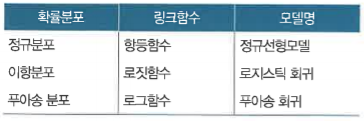

항등함수? $f(x)=x$ <br/>
정규분포에선 독립변수에 대해 아무런 변환도 하지 않는다!

### 일반선형모델의 파라미터 추정
 - 최대우도법에 의한 파라미터 추정을 함 (일반선형모델에선 정규분포 이외의 확률분포가 사용되는 경우도 있기 때문)

### 일반선형모델을 이용한 검정 방법
- 이 책에선 AIC 를 사용한 방법을 씀

> #### 세가지 검정 방법
1. Wald 검정 <br/>
    : 샘플사이즈가 클 때 추정값이 정규분포를 따르는 것을 이용  
      일반선형모델에서는 회귀계수의 t 검정을 실시할 수 없어서 이용됨
2. 우도비 검정<br/>
    : 모델의 적합도를 비교하는 방법
3. 스코어 검정 (별로 사용 x)

<hr/>


## 6.3 로지스틱 회귀

로지스틱 회귀는 이항분포를 사용함. 링크함수에 로짓함수를 사용한 일반선형 모델임

앞서 배운 링크함수의 선형예측자 ($\beta_{0}$+$\beta_{1}$$x$) 를 이용해서 이항분포 ( 2개의 결과만 가짐)의 예측자를 만들어보자
<br/>
ex) 시험의 합격(1), 불합격(0)<br/>
시험의 합불(합격1,불합격0) = $\beta_{0}$+$\beta_{1}\times$$공부시간$  => 일차함수론 당연 불가능!

시험 합격률을 종속변수로 해도 값이 [0,1] 사이이므로 선형예측자로는 불가능

### 로짓함수
로짓함수로 이항분포 함수를 만들 수 있다.<br/>
$f(x)=\log{x \over 1-x}$

### 역함수
어떤 함수 $f(a)=b$ 에 대해 $g(b)=a$가 되는 함수 (x,y가 바뀐 함수) <br/>
ex) 지수함수의 역함수는 로그함수!

<br/>

## 로지스틱 함수
로지스틱 함수는 로짓함수의 역함수! <br/>
로짓함수 f(x), 로지스틱함수 g(x) => $g(f(x))=x$

$g(y)={1 \over 1+e^{-y}}$

#### 로지스틱 함수의 특징
y -> $\infty$ 일 때 g(y) -> 1 <br/>
y -> $-\infty$ 일 때 g(y) -> 0 <br/>
따라서 g(y)는 절대 0 미만이거나 1을 초과하지 않는다!

### 로지스틱 회귀의 구조
성공확률(시험의 합격률) p 에 대해 링크함수의 로짓함수를 적용하면 독립변수인 합격률과 공부시간의 관계를 다음과 같이 나타낼 수 있다.<br/>
<div align="center">$\log{p \over 1-p}=\beta_{0}$+$\beta_{1}\times공부시간$</div>

그렇다면 합격률 p 에 대해서는 다음처럼 나타낼 수 있다.
<div align="center">$p={1 \over 1+\exp[-(\beta_{0}+\beta_{1}\times공부시간)]}$</div>

실제 시험의 합불 데이터를 얻었다고 했을 때, 공부시간이 동일하게 5시간인 학생 10명이 있다고 하자. 그러면 합격자수 M은 성공확률이 시행횟수(표본 10명)인 이항분포를 따른다고 할 수 있다.
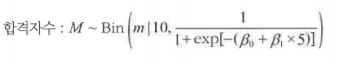
이 식과 같이 <strong>확률분포</strong> 를 따르는 표본을 얻었다고 생각하는 것이 로지스틱 회귀!

이항분포의 확률질량함수는 다음과 같음
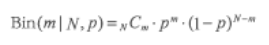

### 로지스틱 회귀의 우도함수
*우도함수 : 파라미터를 넘겨서 우도(파라미터가 정해져 있을 때 표본을 얻을 수 있는 확률) 를 계산할 수 있는 함수 (p.231 4.4)*<br/>

계수 $\beta_{0}$, $\beta_{1}$ 의 추정에 대해 배워보자<br/>
일반선형모델에서는 *최대우도법* 으로 파라미터를 추정한다! <br/><br/>
아래의 data를 얻었을 때
<div align="center">
- 공부시간이 3시간인 학생 9명 중 4명이 합격했다.<br/>
- 공부시간이 5시간인 학생 8명 중 6명이 합격했다.<br/>
- 공부시간이 8시간인 학생 1명 중 1명이 합격했다.<br/>
</div>
이때의 우도함수는 다음과 같다

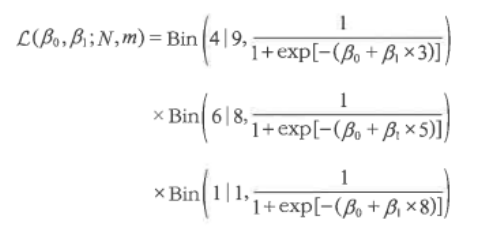

## 실습

#### 분석 준비

In [22]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

#통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3

#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

csv 파일 다운
http://www.hanbit.co.kr/src/10245

In [18]:
#분석할 데이터 읽어오기 (제공해주는 파일 다운)
test_result=pd.read_csv("6-3-1-logistic-regression.csv")
print(test_result)

    hours  result
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0
..    ...     ...
95      9       1
96      9       1
97      9       1
98      9       1
99      9       1

[100 rows x 2 columns]


hours : 공부시간, result : 시험의 합격 여부 (1: 합격, 0: 불합격)
<br/>
### 공부시간과 합격률의 관계 그래프로 그리기
x축: 공부시간, y축: 합격률

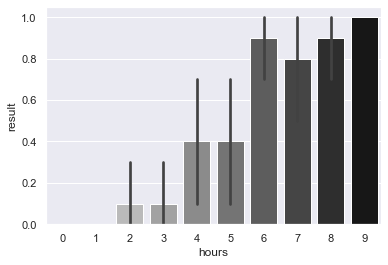

In [19]:
#seaborn 사용

sns.barplot(x="hours",y="result",data=test_result,palette="gray_r")

In [20]:
#공부시간마다의 합격률 계산
#시간으로 그룹화하여 평균값 계산

test_result.groupby("hours").mean()

,result
hours,
0,0.0
1,0.0
2,0.1
3,0.1
4,0.4
5,0.4
6,0.9
7,0.8
8,0.9


### 로지스틱 회귀 실습

로지스틱 회귀모델 추정 <br/>
일반선형모델을 추정할 땐 smf.glm 함수를 사용!

In [23]:
mod_glm=smf.glm(formula="result ~ hours",
               data=test_result,
               family=sm.families.Binomial()).fit()

#### 파라미터 설명
- formula= 종속변수 ~ 독립변수 (5.3.5)
- data : 넣을 data (pandas 데이터프레임)
- family : 확률분포 지정.
- 이항분포: sm.families.Binomial() (기본적으로 로짓함수 지정), 푸아송 분포: sm.families.Poission() (로그함수)
- 명시적으로 로짓함수 지정<br/> sm.families.Binomial(link=sm.families.links.logit)

In [24]:
#로지스틱 회귀 결과 출력
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 31 Jan 2021   Deviance:                       68.028
Time:                        20:23:23   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

Deviance , Pearson chi2 : 모델의 적합도를 나타내는 지표. (Deviance가 크면 모델이 적합하지 않다)<br/>
coef는 회귀계수를 뜻함 <br/>
hours가 1 증가할때마다 result가 0.9289씩 증가 <br/><br/>
<div align="center" style="font-size:18px">
$\log{p \over 1-p}$=-4.5587 + 0.9289 x hours <br/></div>
<br/>
"P>|z| 가 0.05보다 작으면 유의미하다" => 유의미한 결과임

#### AIC
- null 모델 (아무런 입력변수를 넣지 않음) 와 공부시간이라는 독립변수가 있는 모델 중 어느 쪽이 더 좋은 모델인지 비교하기

<br/>
null모델 추정

In [25]:
mod_glm_null=smf.glm("result ~ 1",
                     data=test_result,
                     family=sm.families.Binomial()).fit()

AIC 비교

In [26]:
#소수점 세자리까지
print("Null 모델 : ",mod_glm_null.aic.round(3))
print("변수가 있는 모델 : ",mod_glm.aic.round(3))

Null 모델 :  139.989
변수가 있는 모델 :  72.028


aic가 더 작은 공부시간 독립변수가 있는 모델이 합격률을 예측하는 데 더 도움이 된다! <br/>
(aic이 작을 수록 예측률이 높다)
<br/>
 
### 로지스틱 회귀곡선 그래프 그리기

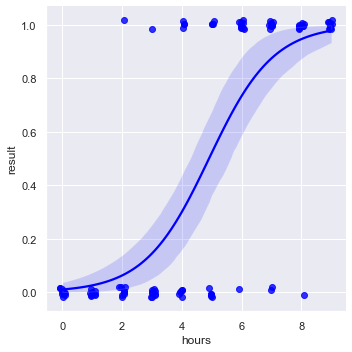

In [30]:
sns.lmplot(x="hours",y="result",
          data=test_result,
          logistic=True,
          scatter_kws={"color":"blue"},
          line_kws={"color":"blue"},
          x_jitter=0.1,y_jitter=0.02)

#logistic=True : 로지스틱 회귀 그래프
#x_jitter , y_jitter: 산포도가 그리는 데이터의 점을 위아래로 흩어지게 하는 설정.

### 성공확률 예측
합격률을 수치로 얻어보자

In [12]:
np.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# 0~9 까지 1씩 증가시키는 등차수열
exp_val=pd.DataFrame({
    "hours":np.arange(0,10,1)
})

# 성공확률의 예측치
pred=mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

공부시간이 증가할수록 합격률이 증가한다!
<br/>
#### 용어 설명
로지스틱 회귀에서 추정된 계수를 해석하기 위해 필요한 용어
<br/>

<strong>오즈 (odds)</strong>
- 성공/실패 확률. 실패하는 것보다 성공하는 것이 몇 배 더 쉬운가 <br/>
&nbsp;&nbsp;&nbsp;&nbsp; p : 성공확률 <br/>
<div align="center">오즈 = ${p \over 1-p}$</div>

로그오즈 : 오즈에 로그를 취한 것  &nbsp;&nbsp; $\log{p \over 1-p}$

#### 오즈비(odd ratio)
- 오즈 간에 비율을 취한 것
- 로그오즈비 : 오즈비에 로그를 취한 것

### 로지스틱 회귀계수와 오즈비의 관계
로지스틱 회귀의 계수와 오즈는 밀접한 관계가 있음 <br/>
회귀계수는 독립변수를 1 단위 변화시켰을 때의 로그오즈비

<br/>
<strong>예제</strong><br/>
공부시간이 1시간일 때와 2시간일 때의 합격률

In [35]:
#공부시간이 1시간일 때의 합격률
exp_val_1=pd.DataFrame({"hours":[1]})
pred_1=mod_glm.predict(exp_val_1)

#공부시간이 2시간일 때의 합격률
exp_val_2=pd.DataFrame({"hours":[2]})
pred_2=mod_glm.predict(exp_val_2)

합격률을 이용하여 로그오즈비 계산

In [36]:
#오즈 (성공/실패)
odds_1=pred_1/(1-pred_1)
odds_2=pred_2/(1-pred_2)

#로그오즈비 (2시간공부/1시간공부)
sp.log(odds_2/odds_1)

<ipython-input-36-e788c2a2e8b1>:6: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  sp.log(odds_2/odds_1)


array([0.929])

In [34]:
mod_glm.params["hours"]

0.9288901756284955

회귀분석에서 공부시간의 계수와 일치한다! <br/>
로그오즈비(공부시간 1시간 증가에 따른) = 공부시간 계수 <br/>
오즈비 = exp(공부시간 계수)


In [37]:
sp.exp(mod_glm.params["hours"])

<ipython-input-37-b5475642cd5c>:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(mod_glm.params["hours"])


2.531697877875776

In [44]:
#오즈비
odds_2/odds_1

0    2.531698
dtype: float64

#### 번외
그렇다면 <br/>
&nbsp; &nbsp; $\log{p \over 1-p}$=-4.5587 + 0.9289 x hours <br/>
공식도 맞을까?

In [38]:
#공부시간이 3시간일 때의 합격률
exp_val_3=pd.DataFrame({"hours":[3]})
pred_3=mod_glm.predict(exp_val_3)

odds_3=pred_3/(1-pred_3) #오즈비 p/(1-p)

sp.log(odds_3)

<ipython-input-38-7649487654dc>:7: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  sp.log(odds_3)


array([-1.772])

In [53]:
-4.5587 + 0.9289*3

-1.772

In [39]:
#공부시간이 4시간일 때의 합격률
exp_val_4=pd.DataFrame({"hours":[4]})
pred_4=mod_glm.predict(exp_val_4)

odds_4=pred_4/(1-pred_4) #오즈비 p/(1-p)

sp.log(odds_4)

<ipython-input-39-a597a17c57e7>:7: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  sp.log(odds_4)


array([-0.843])

In [56]:
-4.5587 + 0.9289*4

-0.843

로짓함수도 시간 증가에 따라 일치하는 걸 확인할 수 있다!

<hr/>

## 6.4 일반선형모델의 평가
일반선형모델에서의 잔차 취급을 설명하고 모델의 손실을 파악해보자 <br/><br/>
*잔차는 데이터와 모델의 괴리를 표현하는 중요한 지표!*

#### 분석 준비

In [57]:
#수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

#그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

#통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

#표시 자릿수 지정
%precision 3

#그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

<strong>6.3 에서 분석한 로지스틱 회귀모델이 데이터에 적합한 모델인지 확인해보자</strong>

In [40]:
#데이터 읽어 들이기
test_result=pd.read_csv("6-3-1-logistic-regression.csv")

#모델링 (로지스틱 회귀분석)
mod_glm=smf.glm("result~hours",data=test_result,
                family=sm.families.Binomial()).fit()

### 피어슨 잔차
이항분포에서의 피어슨 잔차 계산 <br/>
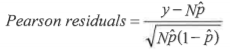
y 종속변수, N : 시행횟수, $\hat{p}$ : 추측한 성공확률 (mod_glm.predict()로 계산한 예측치)

하나하나 예측결과의 시행횟수는 당연히 1이므로 *피어슨 잔차*는 실질적으로 다음과 같다
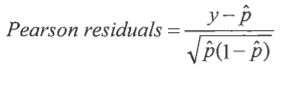

피어슨 잔차의 부모에 있는 $N\hat{p}$(1- $\hat{p}$ ) 는 이항분포의 분산 값과 일치 <br/> 
=> 피어슨 잔차의 분모는 이항분포의 표준편차 <br/>
 이항분포의 분산 $Np(1-p)$ 가 가장 클 때는 p=0.5 일 때. 합불 확률이 같을 때 데이터 분산 정도가 제일 클 것! <br/>
피어슨 잔차의 제곱합은 <strong>피어슨 카이제곱통계량</strong> 이라고도 하고 모델 적합도의 지표가 된다.

### 피어슨 잔차 실습

In [42]:
# 예측한 성공확률
pred=mod_glm.predict()

#종속변수 (시험 합격여부)
y=test_result.result

#피어슨 잔차
peason_resid=(y-pred)/sp.sqrt(pred*(1-pred))
peason_resid.head(3)

<ipython-input-42-3a61cc5e4967>:8: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  peason_resid=(y-pred)/sp.sqrt(pred*(1-pred))


0   -0.102351
1   -0.102351
2   -0.102351
Name: result, dtype: float64

피어슨 잔차가 -0.102351임을 확인할 수 있다.

In [63]:
# 피어슨 잔차는 공식으로 말고 직접 모델에서도 얻을 수 있다
# resid_pearson
mod_glm.resid_pearson.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
dtype: float64

In [61]:
# 피어슨 잔차제곱합은 피어슨 카이제곱통계량
sp.sum(mod_glm.resid_pearson**2)

<ipython-input-61-76965b153964>:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(mod_glm.resid_pearson**2)


84.91138782569993

In [43]:
#피어슨 카이제곱통계량은 summary에서 pearson_chi2를 뜻한다.
mod_glm.pearson_chi2

84.91138782569993

In [66]:
#summary
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Fri, 29 Jan 2021   Deviance:                       68.028
Time:                        21:51:59   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

## deviance
- deviance(디비언스) 는 모델의 적합도를 평가하는 지표
- deviance가 크면 모델이 적합하지 않다고 평가
<br/>
로지스틱 회귀 계수에 근거한 로그우도 $\log\mathcal{L}(\beta_{glm};y)$와 모든 합격여부를 완전히 예측할 수 있을 때의 로그우도 $\log{\mathcal{L}(\beta_{max};y)}$ 를 가지고 deviance를 다음과 같이 계산 가능 <br/>
<div align="center">$deviance=2[\log\mathcal{L}(\beta_{max};y)-\log\mathcal{L}(\beta_{glm};y)]$</div> <br/>
deviance는 잔차제곱합을 우도처럼 표현한 것.<br/>
$\mathcal{L}(\theta) = \theta \times (1-\theta)$

#### deviance 와 우도비 검정
- deviance 계산할 때 로그우도 차이에 2 를 곱한 이유는 우도비 검정할 때 편하기 때문.
- 우도비 검정? deviance 차이를 검정하는 것

### deviance 잔차 계산 코드
deviance 잔차는 deviance 잔차제곱합이 deviance가 된다는 사실로 계산한다 <br/><br/>

deviance 잔차 계산 <br/>

*합격여부를 완전히 예측할 수 있을 때 ($\log{\mathcal{L}(\beta_{max};y)}$ ) 의 로그우도는 $\log(1)$ 즉 0이다!* <br/>
성공확률 100%일 때 합격할 확률은 1이고 성공확률 0%일 때 실패확률도 1이기 때문

In [66]:
# 예측한 성공확률
pred=mod_glm.predict()

# 종속변수(테스트 합격여부)
y=test_result.result

# 합격여부를 완전히 예측할 수 있을 때의 로그우도 - 모델의 로그우도
resid_tmp=0-sp.log(sp.stats.binom.pmf(k=y,n=1,p=pred)) 
#pmf : 확률질량함수 계산. k : 성공횟수, n : 시행횟수, p: 성공확률

#deviance 잔차
deviance_resid=sp.sqrt(2*resid_tmp)*np.sign(y-pred)
#sqrt는 제곱근
# np.sign은 괄호 안의 플러스마이너스 기호를 반환해줌.

#결과 확인
deviance_resid.head(3)

<ipython-input-66-ad5a6ae7046a>:8: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  resid_tmp=0-sp.log(sp.stats.binom.pmf(k=y,n=1,p=pred))
<ipython-input-66-ad5a6ae7046a>:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  deviance_resid=sp.sqrt(2*resid_tmp)*np.sign(y-pred)


0   -0.144369
1   -0.144369
2   -0.144369
Name: result, dtype: float64

회귀 모델에서도 deviance 잔차 제공

In [82]:
# 모델에서도 deviance 잔차를 얻을 수 있다.
mod_glm.resid_deviance.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
dtype: float64

deviance 잔차 제곱합은 deviance가 됨

In [83]:
sp.sum(mod_glm.resid_deviance**2)

<ipython-input-83-42bda98c5217>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(mod_glm.resid_deviance**2)


68.0278811811727

In [44]:
#deviance는 summary 함수에서도 제공
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Sun, 31 Jan 2021   Deviance:                       68.028
Time:                        23:14:58   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### 교차 엔트로피 오차
- 머신러닝에서 로지스틱 회귀를 교차 엔트로피 오차의 최소화라는 관점으로 자주 설명한다.
- 교차 엔트로피 오차를 최소로 하는 것은 deviance 를 최소로 하는 것과 동일, 로지스틱 회귀의 로그우도를 최대로 하는 것과 같다

(p.331 6.4.9)

<hr/>

# 6.5 푸아송 회귀
> 푸아송 회귀란? <br/>
확률 분포에 푸아송 분포를 사용하고, 링크함수에 로그함수를 사용한 일반선형모델<br/>
푸아송 분포 : 단위 시간 or 단위 공간에서 어떤 사건이 발생하는 횟수를 나타내는 확률분포! (6.1.7)<br/>

예제) 기온에 따른 맥주 판매 개수 예측 <br/>
 $\beta_{0}+\beta_{1}\times 기온 (^\circ C)$ <br/>
 
 ### 푸아송 회귀의 구조
 링크함수의 로그함수를 사용하면 맥주 판매 개수와 기온의 관계는 다음과 같다 <br/>
  $\log{[맥주 판매 개수]}=\beta_{0}+\beta_{1}\times 기온 (^\circ C)$ <br/>
  => $맥주 판매 개수 = \exp{[\beta_{0}+\beta_{1}\times기온(^\circ C)]}$ <br/>
  
  맥주 판매 개수 Y 는 강도 $\lambda$, 즉 맥주판매개수 기댓값의 푸아송 분포를 따를 것이다. <br/><br/>
<div align="center" style="font-size:17px;">  맥주 판매 개수 : $Y$ ~ $Pois(y|\exp{[\beta_{0}+\beta_{1}\times기온]})$</div>
  
<br/>
이 때 푸아송 분포의 확률질량함수는 다음과 같다.<br/>
<p style="font-size:20px">$Pois(y|\lambda)={e^{-\lambda}\lambda^{y}\over y!}$</p>

#### 분석 준비

In [86]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [45]:
# 데이터 읽어오기
beer=pd.read_csv("6-5-1-poisson-regression.csv")
beer

,beer_number,temperature
0,6,17.5
1,11,26.6
2,2,5.0
3,4,14.1
4,2,9.4
5,2,7.8
6,3,10.6
7,5,15.4
8,6,16.9
9,7,21.2


### 푸아송 회귀 실습
푸아송 회귀모델 추정하기 <br/>
기온(독립변수)에 따른 맥주 판매 개수(종속변수)

In [46]:
mod_pois=smf.glm("beer_number ~ temperature",beer,
                family=sm.families.Poisson()).fit()
#푸아송 회귀이므로 family=sm.families.Poisson() 라고 지정해준다!

mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Sun, 31 Jan 2021   Deviance:                       5.1373
Time:                        23:19:09   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

$\beta_{0}$:0.4476,  $\beta_{1}$:0.0761 <br/>
기온이 양수이므로 기온이 오르면 판매개수도 늘어날 것!  <br/>

### Null 모델과 변수가 들어간 모델 AIC 비교하기

In [47]:
#null 모델 추정
mod_pois_null=smf.glm("beer_number ~ 1",data=beer,
                     family=sm.families.Poisson()).fit()

In [48]:
#AIC 비교
print("Null 모델  :",mod_pois_null.aic.round(3))
print("변수가 있는 모델   :",mod_pois.aic.round(3))

Null 모델  : 223.363
변수가 있는 모델   : 119.343


독립변수가 들어간 모델의 AIC가 더 작다. => 기온 독립변수을 적용한 모델이 적합하다. 
<br/>

### 회귀곡선 그래프
푸아송 회귀의 경우에는 seaborn 함수로 그릴 수 없으므로 추정된 모델의 예측값을 산포도 위에 덧그리도록 하자

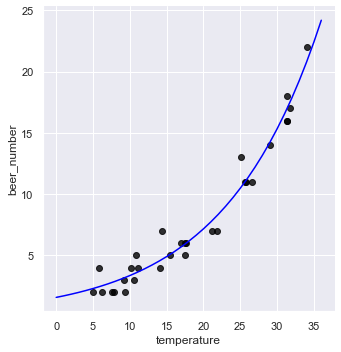

In [60]:
# 예측값 작성
x_plot=np.arange(0,37) #온도 0~37도
pred=mod_pois.predict(pd.DataFrame({"temperature":x_plot}))

# 회귀곡선을 그리지 않은 lmplot
sns.lmplot(y="beer_number",x="temperature",
          data=beer,fit_reg=False,
          scatter_kws={"color":"black"})

# 회귀곡선을 덧그리기
plt.plot(x_plot,pred,color="blue")

#### 회귀계수 해석
링크함수 - 로그함수의 경우 계수 해석 방법<br/>
로그의 특징으로 덧셈이 곱셈이 되기 때문에 (logx + log10 = log10x) <span style="color:red">로그함수에선 기온이 1$^\circ C$ 오르면 맥주 판매 개수가 Y배 된다</span>

<br/>
코드로 기온 1$^\circ C$가 오르면 맥주판매개수가 몇 배 되는지 확인해보기

In [61]:
# 기온이 1도일 때의 판매 개수의 기댓값
exp_val_1=pd.DataFrame({"temperature":[1]})
pred_1=mod_pois.predict(exp_val_1)

# 기온이 2도일 때 판매 개수의 기댓값
exp_val_2=pd.DataFrame({"temperature":[2]})
pred_2=mod_pois.predict(exp_val_2)

#기온이 1도에서 2도로 오르면 판매 개수는 몇 배가 되는지 확인
pred_2/pred_1

0    1.079045
dtype: float64

대략 1.079배가 되는 걸 확인할 수 있다. <br/>
이 결과는 회귀계수에 exp(지수함수)를 취한 값과 동일하다.

In [62]:
mod_pois.params["temperature"]

0.07607644127717691

In [104]:
sp.exp(mod_pois.params["temperature"])

<ipython-input-104-46b53f7a02bd>:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(mod_pois.params["temperature"])


1.079045054586893